In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
#file_path='/content/drive/My Drive/Course Dataset/metadata.csv' #kirti's
#file_path1='/content/drive/My Drive/Course Dataset/metadata_test.csv' #kirti's
#file_path2='/content/drive/My Drive/Course Dataset/metadata_kaggle.csv' #kirti's
df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Mounted at /content/drive


In [ ]:
df_metadata_test.head()

,user_snippet,x-axis__sum_values,x-axis__median,x-axis__mean,x-axis__length,x-axis__standard_deviation,x-axis__variance,x-axis__root_mean_square,x-axis__maximum,x-axis__absolute_maximum,...,z-axis__median,z-axis__mean,z-axis__length,z-axis__standard_deviation,z-axis__variance,z-axis__root_mean_square,z-axis__maximum,z-axis__absolute_maximum,z-axis__minimum,activity
0,3006_0,190.60,1.365,1.9060,100.0,6.192680,38.349290,6.479362,19.50,19.50,...,-0.950,-0.7361,100.0,3.607485,13.013948,3.681819,10.19,10.19,-9.92,Walking
1,3006_1,-115.08,-2.070,-1.1508,100.0,5.779997,33.408361,5.893446,16.82,16.82,...,-0.420,-0.1361,100.0,3.551672,12.614374,3.554279,9.47,11.75,-11.75,Walking
2,3006_2,-171.08,-1.710,-1.7108,100.0,5.347172,28.592243,5.614186,13.95,13.95,...,-0.480,-0.1396,100.0,2.636698,6.952178,2.640391,8.35,8.50,-8.50,Walking
3,3006_3,633.38,5.790,6.3338,100.0,5.019286,25.193234,8.081476,18.77,18.77,...,-0.995,0.2610,100.0,4.298020,18.472975,4.305937,11.75,11.75,-8.35,Downstairs
4,3006_4,160.75,1.880,1.6075,100.0,5.769199,33.283657,5.988966,19.50,19.50,...,-0.630,-0.4341,100.0,3.324155,11.050006,3.352380,12.03,12.03,-8.27,Walking


In [ ]:
# Extract features and target
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']
X_test_df = df_metadata_test.drop(columns=['activity', 'user_snippet'])
y_test_df = df_metadata_test['activity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_df_scaled=scaler.transform(X_test_df)

In [ ]:
lg_model = LogisticRegression(multi_class="ovr")


In [ ]:
lg_model.fit(X_train, y_train)

# Apply the trained model to your unseen test data
predictions = lg_model.predict(X_test)

accuracy =lg_model.score(X_test, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7987321711568938

In [ ]:
# Evaluate the performance of the model on the test data
accuracy =lg_model.score(X_test_df, y_test_df)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7352637021716649


# Hyperparameter tuning using grid search

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'C': [1.5, 2, 2.5, 3, 4, 5 ],  # Regularization parameter ,0.001, 0.01, 0.1, 0.15, 0.25, 1, 1.5, 2,
    'penalty': [ 'l2']  # Penalty norm
}

In [ ]:
# Initialize logistic regression model
lg_model = LogisticRegression(multi_class="ovr", max_iter=1000, random_state=42,  class_weight='balanced')  #

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lg_model, param_grid=param_grid, cv=10, scoring='accuracy')


In [ ]:
# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 5, 'penalty': 'l2'}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8423137876386688


In [ ]:
# Predict on the test set using the best model
y_pred_test = best_model.predict(X_test_df_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_df, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.795760082730093


In [ ]:
pip install tabulate

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate
class_report_str = classification_report(y_test_df, y_pred_test)

# Convert the classification report string to a list of lines
class_report_lines = class_report_str.split('\n')

# Remove empty lines and headers
class_report_lines = [line.split() for line in class_report_lines if line.strip() and line.strip() != 'precision']

# Print the classification report table
headers = class_report_lines[0]
data = class_report_lines[1:]

print("Classification Report:")
print(tabulate(data, headers=headers, tablefmt='grid'))

Classification Report:
+------------+-------------+----------+------------+-----------+
|            | precision   |   recall |   f1-score |   support |
+============+=============+==========+============+===========+
| Downstairs | 0.31        |     0.35 |       0.33 |    174    |
+------------+-------------+----------+------------+-----------+
| Jogging    | 0.94        |     0.98 |       0.96 |    689    |
+------------+-------------+----------+------------+-----------+
| Sitting    | 0.56        |     0.91 |       0.69 |     22    |
+------------+-------------+----------+------------+-----------+
| Standing   | 1.00        |     0.6  |       0.75 |     43    |
+------------+-------------+----------+------------+-----------+
| Upstairs   | 0.77        |     0.51 |       0.62 |    238    |
+------------+-------------+----------+------------+-----------+
| Walking    | 0.79        |     0.83 |       0.81 |    768    |
+------------+-------------+----------+------------+-----------+
| 

\# Applying best model on Test Data

In [ ]:
X_Kaggle = df_metadata_kaggle.drop(columns=['user_snippet'])
X_kaggle_scaled = scaler.transform(X_Kaggle)

In [ ]:

y_kaggle_pred = best_model.predict(X_kaggle_scaled)

In [ ]:

# Specify path within Google Drive
predictions_file_path = '/content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_LG_kaggle.csv'

# Save predictions for the Kaggle data to a CSV file
df_metadata_kaggle['prediction'] = y_kaggle_pred
df_metadata_kaggle.to_csv(predictions_file_path, columns=['user_snippet', 'prediction'], index=False)

print("Predictions for Kaggle data saved to:", predictions_file_path)

Predictions for Kaggle data saved to: /content/drive/MyDrive/Machine Learning- Session/Course Work Project/predictions_LG_kaggle.csv


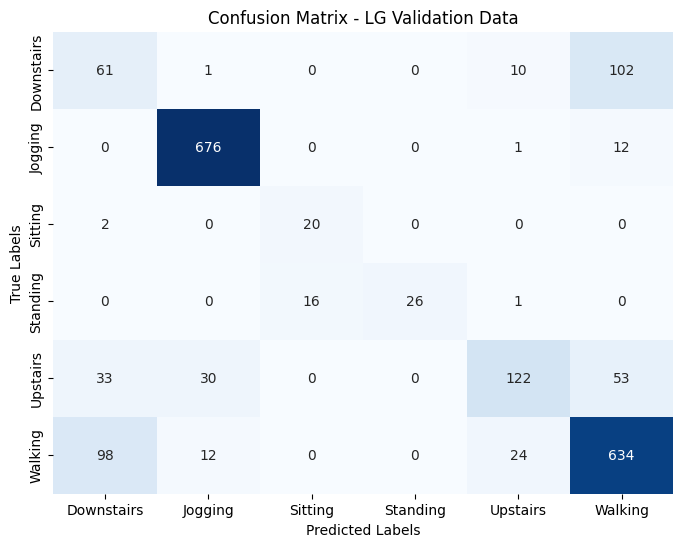

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict on the test set using the best model
y_pred_test = best_model.predict(X_test_df_scaled)

# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_df, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - LG test Data")
plt.show()

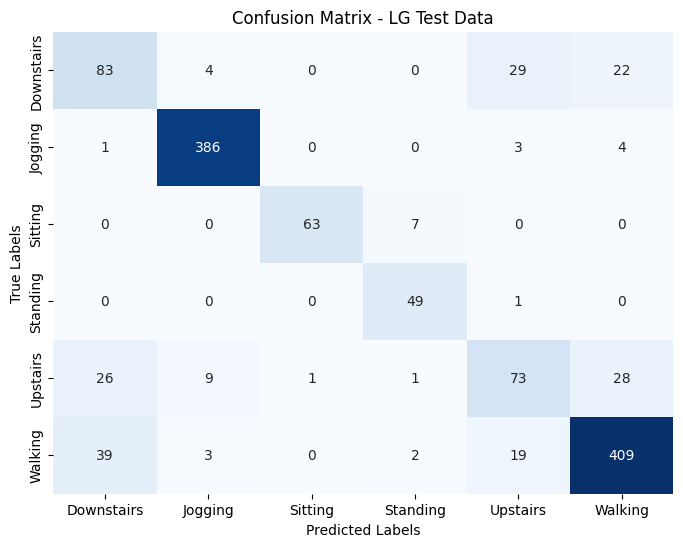

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Get unique labels
labels = sorted(y_test_df.unique())

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - LG validation Data")
plt.show()

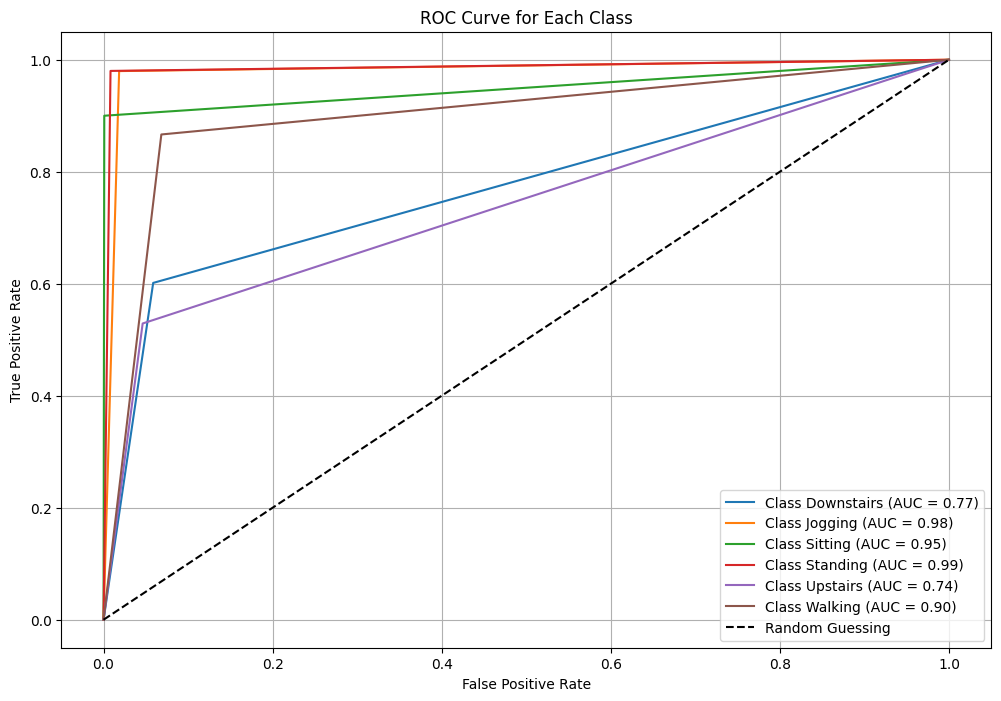

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for label in labels:
    fpr, tpr, _ = roc_curve(y_test == label, y_pred == label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

